**Author:** Batjargal (Alex) Bayarsaikhan <br/>
**Date:** July 17-18, 2018

# Statement

This exercise provides a  few datasets in csv format of student performance data derived from the University of Minho, Portugal. The task is a series of analytics questions focused on understanding the data and its relation to predicting the target (G3 >= 10).

The Task:

- You can use either the Math(student-mat) or Portuguese(student-por) dataset.
- Perform some simple exploratory analysis and generate summary statistics to get a sense of what is in the data.
- Describe the quality of the data.
- Generate a few charts that you feel conveys 2 or more important relationships in the data.
- Describe the relationship of the attributes with the final year scores(G1, G2, G3) and share any interesting insights you’ve found.
- Build a model to predict whether a given student is going to pass G3(score >= 10).
- Write all of this into a python notebook, upload to a git repo, and share the link with us to review.  Be prepared to discuss your methodologies and approach.
 

 

Context:
- Assume the audience for your write-up is a non-technical stakeholder.
- Assume the audience for your code is a colleague who may need to read or modify it in the future.

# My approach 

I worked on a dataset of Math students performance in **'student-mat.csv'** file. I divided the assignment into 2 parts:
 - **Part 1** - Analyzing and visualizing student performance data <br/>
 Used Pandas, a library for data manipulation and analysis. In order to find the relationships between Grades and other attributes, I calculated correlations and filtered student grades by 'higher than 16', 'between 10-16' and 'less than 10'.
 <br/><br/>
 - **Part 2** - Predicting student final grade <br/>
 Created a Multiple Linear Regression model using scikit-learn, a machine learning library in Python.
 
 


## Data quality

I used a math student performance data from 'student-mat.csv' file. Data quality of the dataset is good. There is no missing data or wrong labeled values in the set. Also, I think that the given data is served the intended purpose and its attributes are very precise.

There was not any problem in the data file that prevent me from using the data to do what I hope to achieve with it.

# Part 1 - Analyzing and visualizing student performance data

## Importing libraries 

In [1]:
import pandas as pd # a library for data manipulation and analysis
import numpy as np
from sklearn.preprocessing import LabelEncoder       
from sklearn.preprocessing import MinMaxScaler  # Feature Scaling

#libraries for chart
import matplotlib.pyplot as plt

## Defining a class for student performance report 

In [2]:
#class for presenting student performance report
class StudentPerformanceReport(object):    
    """A class for analyzing and visualizing student performance data."""
    
    def __init__(self, title, filename, sep=';', constants={}):
        """Initialize the class.
        
        Parameters:
            filename -- path of a file
            sep -- the imaginary part (default ';')            
            
        """
        self.title = title if title else ''
        self.filename = filename
        self.separator = sep
        self.constants = constants
        
        #for storing all data for presenting a report
        self.report_object = {}
        
        # helper variables for presenting report
        self.pre_space = '   '
        
        # defining constant values for report visualization
        self.constants = { 
            'school_GP': 'Gabriel Pereira',
            'school_MS': 'Mousinho da Silveira',
            'gender_F': 'Female',
            'gender_M': 'Male',
            'grade_G1': 'First Period',
            'grade_G2': 'Second Period',
            'grade_G3': 'Final',
            'student_top' : 'Higher than 80%',
            'student_avg' : 'Between 50-80%',
            'student_low' : 'Lower than 50%',
            'labels' : { "school" : "Student's school", "sex" : "Student's sex",
                        "age" : "Age", "address" : "Home address type",
                        "famsize" : "Family size", "Pstatus" : "Parent's cohabitation status",
                        "Medu" : "Mother's education", "Fedu" : "Father's education",
                        "Mjob" : "Mother's job", "Fjob" : "Father's job",
                        "reason" : "Reason to choose this school", "guardian" : "Student's guardian",
                        "traveltime" : "Home to school travel time", "studytime" : "Weekly study time",
                        "failures" : "Number of past class failures", "schoolsup" : "Extra educational support",
                        "famsup" : "Family educational support", "paid" : "Extra paid classes",
                        "activities" : "Extra-curricular activities", "nursery" : "Attended nursery school",
                        "higher" : "Wants to take higher education", "internet" : "Internet access at home",
                        "romantic" : "With a romantic relationship", "famrel" : "Quality of family relationships",
                        "freetime" : "Free time after school", "goout" : "Going out with friends",
                        "Dalc" : "Workday alcohol consumption", "Walc" : "Weekend alcohol consumption",
                        "health" : "Current health status", "absences" : "Number of school absences", 
                       "G1" : "First period grade", "G2" : "Second period grade", "G3" : "Final grade",}
        }
        
        # update user defined constant values
        self.constants.update(constants)
        
        pass
        
    def performAnalysis(self):
        """ to perform analysis on a file data """
        
        # reading csv file using pandas' read_csv function
        self.student_dataframe = pd.read_csv(self.filename, sep= self.separator)
    
        # using default summary function of pandas library
        self.default_summary = self.student_dataframe.describe()
        
        # to find average, max, min of student age 
        student_age_average = self.default_summary.loc['mean']['age'];
        student_age_max = self.default_summary.loc['max']['age'];
        student_age_min = self.default_summary.loc['min']['age'];
        
        # to find total number of students    
        total_number_of_students = len(self.student_dataframe)
                
        # to find number of studens by school, gender, age    
        number_of_students_by_school = {}
        number_of_students_by_gender = {}
        number_of_students_by_age = {}
        
        for school, indices in self.student_dataframe.groupby('school').groups.items():
            number_of_students_by_school['school_' + school] = len(indices)
            
        for gender, indices in self.student_dataframe.groupby('sex').groups.items():
            number_of_students_by_gender['gender_' + gender] = len(indices)
            
        for age, indices in self.student_dataframe.groupby('age').groups.items():
            number_of_students_by_age[age] = len(indices)
        
        
        # to store the information to report object
        self.report_object['number_of_students_by_school'] = number_of_students_by_school
        self.report_object['number_of_students_by_gender'] = number_of_students_by_gender
        self.report_object['number_of_students_by_age'] = number_of_students_by_age        
        
        self.report_object['total_number_of_students'] = total_number_of_students
        
        self.report_object['student_age_average'] = student_age_average
        self.report_object['student_age_max'] = student_age_max
        self.report_object['student_age_min'] = student_age_min
        
        df = self.student_dataframe
        self.report_object['num_of_stud_higher_80'] = len(df [ df['G3'] >= 16 ])
        self.report_object['num_of_stud_between_50_80'] = len(df [ (9 < df['G3']) & (df['G3'] < 16) ])
        self.report_object['num_of_stud_lower_50'] = len(df [ df['G3'] < 10 ])
        
        # adding average of grades into report_object
        self.report_object.update({
            'grade_G1_mean' : self.default_summary.loc['mean']['G1'] / 20 * 100,
            'grade_G2_mean' : self.default_summary.loc['mean']['G2'] / 20 * 100,
            'grade_G3_mean' : self.default_summary.loc['mean']['G3'] / 20 * 100         
        })
        
        pass
    
    def drawGraphs(self):
        """Visualization of data. No return value. Directly print and draw charts to console."""
        
        legends = [self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']]
        data_for_graphs = self.__prepareDataForGraph()
        
        print('', end='\n')
        print('Visualization:')
        print('-----------------------')
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=2)  
        
        # to draw number of students by grades as a pie chart
        data_for_graphs['num_stud_by_grade'].plot(kind='pie', y=0, autopct='%.2f', title='Percentage of students by grade \n', ax=axes[0])
        
        # to draw weekly study time as a bar chart
        data_for_graphs['studytime'].plot(kind='bar', title='Weekly study time by grade \n', fontsize=10, ax=axes[1])
        
        # get correlation values from data objects for graphs       
        data_correlations = data_for_graphs['correlations']
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=2)        

        # to draw correlation chart of top and low student attributes, to show top 5 factors
        axes_subplot_top = data_correlations['grades_corr_top'][:5].plot(kind='bar', ax=axes[0], title='Key factors of Top studens \n whose grades higher than 80% \n')
        axes_subplot_low = data_correlations['grades_corr_low'][:5].plot(kind='bar', ax=axes[1], title='Key factors of Low studens \n whose grades less than 50% \n')
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=1)
        # remove the unrelated columns
        axes_subplot_avg = data_correlations['grades_corr_avg'].drop(['school', 'age', 'sex', 'guardian']).plot(kind='bar', stacked=True, ax=axes, title='Compared to average students factors \n')
                     
        # change labels of charts
        xlabels_top = []
        xlabels_avg = []
        xlabels_low = []
        
        #finding lavels from constants object
        for item in axes_subplot_top.get_xticklabels():
            if self.constants['labels'][item.get_text()]:
                xlabels_top.append(self.constants['labels'][item.get_text()])
                
        #finding lavels from constants object
        for item in axes_subplot_avg.get_xticklabels():
            if self.constants['labels'][item.get_text()]:
                xlabels_avg.append(self.constants['labels'][item.get_text()])
               
        #finding lavels from constants object 
        for item in axes_subplot_low.get_xticklabels():
            if self.constants['labels'][item.get_text()]:
                xlabels_low.append(self.constants['labels'][item.get_text()])
                
        # setting x tick labels.
        axes_subplot_top.set_xticklabels(xlabels_top, fontsize=10, rotation='vertical')
        axes_subplot_low.set_xticklabels(xlabels_low, fontsize=10, rotation='vertical')
        axes_subplot_avg.set_xticklabels(xlabels_avg, fontsize=10, rotation='vertical')
        
        # setting legends text
        axes_subplot_top.legend(legends)
        axes_subplot_low.legend(legends)
        axes_subplot_avg.legend(legends)
        
        pass
    
    def __prepareDataForGraph(self):
        """Private function for internal usage.
        Preparing data for visualization data by charts."""
        
        grade_columns = ['G1', 'G2', 'G3']
        df = self.student_dataframe.copy()
        
        
        #finding number of students by grades (higher than 80, between 50-80, less than 50 per cent)
        num_of_stud_higher_80 = len(df [ df['G3'] >= 16 ])
        num_of_stud_between_50_80 = len(df [ (9 < df['G3']) & (df['G3'] < 16) ])
        num_of_stud_lower_50 = len(df [ df['G3'] < 10 ])
        
        # data frame for number of students by grades
        df_num_stud_by_grade = pd.DataFrame([num_of_stud_higher_80, num_of_stud_between_50_80, num_of_stud_lower_50],
                                     index=[self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']])
        

        # using temporary variable for updating dataframe column values
        temp_array_for_encoder = df.iloc[:, :].values
        
        # Encoding categorical data
        dic_label_encoders = {}        
        for column in df.select_dtypes(include=['object']).columns:
            dic_label_encoders[column] = LabelEncoder()
            df[column] = dic_label_encoders[column].fit_transform(temp_array_for_encoder[:, self.__columnIndexByName(column)])

        #finding correlations between attributes by top students whoes grades equal or higher than 16
        df_top_students = df [ df['G3'] >= 16 ].copy()
        correlations_top = df_top_students[df_top_students.columns].corr().drop(grade_columns)
        correlations_G3_top = correlations_top.sort_values('G3', ascending=False)['G3'].rename('G3_top')

        #finding correlations between attributes by average students whoes grades between 10 and 15
        df_average_students = df [ (9 < df['G3']) & (df['G3'] < 16) ].copy() 
        correlations_average = df_average_students[df_average_students.columns].corr().drop(grade_columns)
        correlations_G3_average = correlations_average.sort_values('G3', ascending=False)['G3'].rename('G3_avg')

        #finding correlations between attributes by low students whoes grades equal or less than 10
        df_low_students = df [ df['G3'] < 10 ].copy()
        correlations_low = df_low_students[df_low_students.columns].corr().drop(grade_columns)
        correlations_G3_low = correlations_low.sort_values('G3', ascending=False)['G3'].rename('G3_low')
        
        # combine 3 Series into one dataframe
        df_correlations = pd.concat([correlations_G3_top, correlations_G3_average, correlations_G3_low], axis=1)
        grades_corr_top = df_correlations.sort_values('G3_top', ascending=False)
        grades_corr_avg = df_correlations.sort_values('G3_avg', ascending=False)
        grades_corr_low = df_correlations.sort_values('G3_low', ascending=False)
                                          
        # fill missing value by row average        
        grades_corr_top = grades_corr_top.T.fillna(grades_corr_top.mean(axis=1)).T
        grades_corr_avg = grades_corr_avg.T.fillna(grades_corr_avg.mean(axis=1)).T
        grades_corr_low = grades_corr_low.T.fillna(grades_corr_low.mean(axis=1)).T
        
        # to use scaling using MinMaxScaler
        sc = MinMaxScaler()       
        
        grades_corr_top = pd.DataFrame(sc.fit_transform(grades_corr_top.values), index=grades_corr_top.index, columns=grades_corr_top.columns)
        grades_corr_avg = pd.DataFrame(sc.fit_transform(grades_corr_avg.values), index=grades_corr_avg.index, columns=grades_corr_avg.columns)
        grades_corr_low = pd.DataFrame(sc.fit_transform(grades_corr_low.values), index=grades_corr_low.index, columns=grades_corr_low.columns)

        
        #Analysizing Study time
        df_study_time_top = df [ df['G3'] >= 16 ]['studytime'].copy()
        df_study_time_avg = df [ (9 < df['G3']) & (df['G3'] < 16)]['studytime'].copy()
        df_study_time_low = df [ df['G3'] < 10 ]['studytime'].copy()
        
        
        #studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)        
        def calculateStudyTime(value):
            if value == 4:
                return 14
            elif value == 3:
                return 8
            elif value == 2:
                return 3.5
            else: #1
                return 1.5

        study_time_top = df_study_time_top.apply(calculateStudyTime).mean()
        study_time_avg = df_study_time_avg.apply(calculateStudyTime).mean()
        study_time_low = df_study_time_low.apply(calculateStudyTime).mean()
        
        # data frame of study time information
        df_study_time = pd.DataFrame([study_time_top, study_time_avg, study_time_low],
                                     index=[self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']],
                                    columns=[self.constants['labels']['studytime']])
        
        # storing all variables into one united data object for drawing graphs
        data_for_graphs = {
            'correlations' : {
                'grades_corr_top' : grades_corr_top,
                'grades_corr_avg' : grades_corr_avg,
                'grades_corr_low' : grades_corr_low
            },
            'studytime' : df_study_time,
            'num_stud_by_grade' : df_num_stud_by_grade
        }
        return data_for_graphs
    
    def __columnIndexByName(self, column_name):
        """Finding column index by column name."""
        i = 0
        for name in self.student_dataframe.columns:
            if name == column_name:
                break
            i+=1
        return i
                
    def generateSummary(self):
        """Print summary information of the report object to console. 
        No return value.
        """
        
        str_filled_frame = '*'.zfill(len(self.title) + 8).replace('0', '*')
        
        print(str_filled_frame)
        print('*** {} ***'.format(self.title))
        print(str_filled_frame)
        print('', end='\n')
        
        print('General information:')
        print('-----------------------')
        print('{}Total number of students: {}'.format(self.pre_space, self.report_object['total_number_of_students']))
        
        print('{}Number of students by gender:'.format(self.pre_space))
        for gender, number in self.report_object['number_of_students_by_gender'].items():
            school = self.constants[gender] if gender in self.constants else gender
            print('       {}: {}'.format(school, number))
        
        print('{}Number of students by school:'.format(self.pre_space))
        for school, number in self.report_object['number_of_students_by_school'].items():
            school = self.constants[school] if school in self.constants else school
            print('       {}: {}'.format(school, number))   
            
        print('', end='\n')
        print('Performance indicators:')
        print('-----------------------')
        print('{}Average grades of total studens:'.format(self.pre_space))
        
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G1'], self.report_object['grade_G1_mean']))
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G2'], self.report_object['grade_G2_mean']))
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G3'], self.report_object['grade_G3_mean']))
                
        print('{}Number of students by grade:'.format(self.pre_space))
        
        print('{}Higher than 80%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_higher_80']))
        print('{}Between 50-80%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_between_50_80']))
        print('{}Lower than 50%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_lower_50']))
        
        pass
        
        

## Usage of  StudentPerformanceReport class

***************************************
*** Math Student Performance Report ***
***************************************

General information:
-----------------------
   Total number of students: 395
   Number of students by gender:
       Female: 208
       Male: 187
   Number of students by school:
       Gabriel Pereira: 349
       Mousinho da Silveira: 46

Performance indicators:
-----------------------
   Average grades of total studens:
      First Period: 54.54 %
      Second Period: 53.57 %
      Final: 52.08 %
   Number of students by grade:
      Higher than 80%: 40
      Between 50-80%: 225
      Lower than 50%: 130

Visualization:
-----------------------


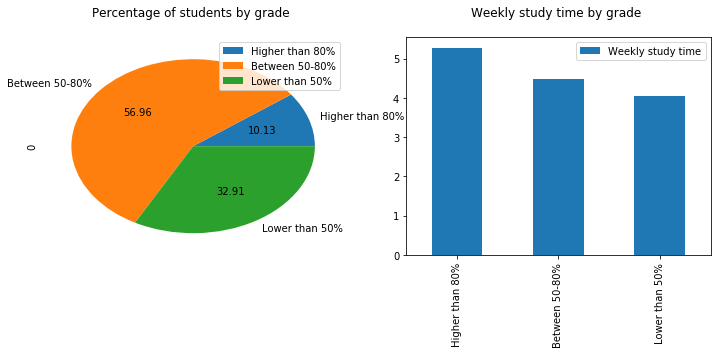

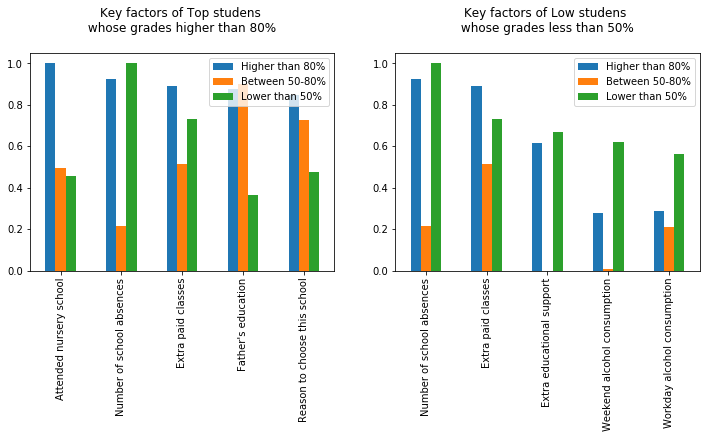

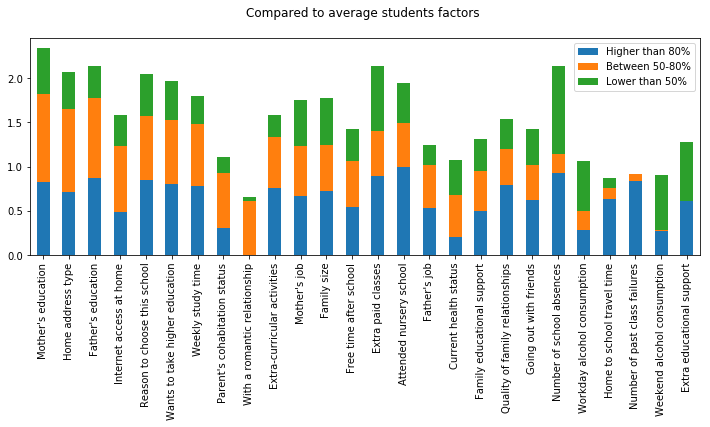

In [3]:
# reading data file of a student performance report
performance_report = StudentPerformanceReport(title='Math Student Performance Report', filename='./student_performance/student-mat.csv', sep=';')

# to perform analysis on a file data 
performance_report.performAnalysis()

# Print summary information of the report object to console
performance_report.generateSummary()

# Visualization
performance_report.drawGraphs()

## Summary

There are 395 students, 208 females and 187 males. There are 349 students from Gabriel Pereira school, 46 students from Moushinho da Silveira school. 
Agerage grades in the first and second period is 54.54% and 53.57% respectively. The average of final grades is 52.09%. 40 students got higher grade than 80%, 130 students got lower than 50%, 225 students got a grade between 50 and 80 percentages in the final. 

The pie chart is about the percentage of students by grade. Top students who got higher than 16 scores in the final are only around 10 per cent in the data.<br/>
But weekly study time is slightly similiar for all students around 4.5 hours a week.

Most of top students whose grades higher than 80% (16 scores) attended nursery school and took extra paid classes within the course subject. One interesting point is that both of top students and low students whose scores less than 10 had almost same numbers of school absences. 

We can see that  father's and mother's education is an important factor for influencing student performance. While workday and weekend alcohol consumption affected the grades of low students whose grades less than 50 per cent (10 scores).

Accourding to the stacked chart, other average students whose grades between 50-80% (10-15 scores), they usually do not absence the classes and tend to have a romantic relationship.


# Part 2 - Predicting student final grade

## Importing libraries

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder # for encoding categorical data
from sklearn.cross_validation import train_test_split # for splitting the dataset into the Training set and Test set
from sklearn.linear_model import LinearRegression # Linear regression


/home/bb/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Defining a class for predicting student final grade

In [5]:
#Used Multiple Linear Regression model for prediction.

class StudentFinalGradeModel:
    """A class for predicting student final grade."""
    
    def __init__(self, filename, sep=';'):
        self.filename = filename
        self.sep = sep
        self.student_dataframe = None
        
        self.__buildingMLR()
        pass

    def __buildingMLR(self):
        """Building the Multiple Linear Regression"""

        self.__dataPreprocessing()
        
        # Fitting Multiple Linear Regression to the Training set
        self.regressor = LinearRegression()
        self.regressor.fit(self.X_train, self.y_train)
 
    def __dataPreprocessing(self):        
        """Data Preprocessing"""
        
        # Importing the dataset
        self.student_dataframe = pd.read_csv(self.filename, sep=self.sep)        
        
        # remove not important columns for predicting final grade
        not_important_columns_for_prediction = [ "health", "Pstatus", "school", "age", "famsize", "internet", "nursery", "higher",  "Fedu", "Medu", "Mjob", "Fjob", "absences", "reason"]
        
        for column in not_important_columns_for_prediction:
            self.student_dataframe.pop(column)
        
        X = self.student_dataframe.iloc[:, 0:-1].values # all columns except 'G3' are input values
        y = self.student_dataframe.iloc[:, -1].values # column 'G3' is output value
        
        self.dic_label_encoders = {}
            
        # Encoding categorical data
        # Encoding the Independent Variable
        columns_indices = []
        for column in self.student_dataframe.select_dtypes(include=['object']).columns:
            columnIndex = self.__columnIndexByName(column)
            self.dic_label_encoders[column] = LabelEncoder()
            X[:, columnIndex] = self.dic_label_encoders[column].fit_transform(X[:, columnIndex])
            columns_indices.append(columnIndex)
            
        #dummy variables        
        self.onehotencoder = OneHotEncoder(categorical_features = columns_indices)
        X = self.onehotencoder.fit_transform(X).toarray()    
        
        # Splitting the dataset into the Training set and Test set
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        
    def __columnIndexByName(self, column_name):
        """Finding column index by column name"""
        i = 0
        for name in self.student_dataframe.columns:
            if name == column_name:
                break
            i+=1
        return i
    
    def predictTestResult(self):
        """Predicting the test set results"""
    
        # Predicting the Test set results
        y_pred = self.regressor.predict(self.X_test)
        y_pred = np.floor(y_pred)        
        
        count_correct = 0
        for i in range(len(y_pred)):
            if y_pred[i] == self.y_test[i]:
                count_correct += 1
                
        accuracy = count_correct / len(y_pred) * 100
        return accuracy
    
    def predictWhetherPassG3orNot(self, student_info):
        """Predicting whether a given student is going to pass G3 (score >= 10) or not.
        No return value. Directly print the result to the console."""
        
        # Predicting the user set results
        X = self.__prepare_single_row_data(student_info)
        y_pred = self.regressor.predict(X)
        
        score = np.round(y_pred)[0]            
            
        if score >= 10:
            txt_result = "pass"
        else:
            txt_result = "fail"
        
        print('Prediction (pass if score >= 10):')
        print('The student is going to {0} G3 by {1:.0f} scores.'.format(txt_result, score), end='\n\n')
        print('Actual final score (G3) is {}.'.format(student_info['G3']))
        
    def __prepare_single_row_data(self,student_info):
        """Private function for internal use is called from predictWhetherPassG3orNot function.
        Preparing single row data for prediction function.
        """
        
        X = np.array([ student_info.values[:-1] ]) # all columns except 'G3' are input values        
            
        # Encoding categorical data
        for column in self.student_dataframe.select_dtypes(include=['object']).columns:
            columnIndex = self.__columnIndexByName(column)
            X[:,columnIndex] = self.dic_label_encoders[column].transform(X[:, columnIndex])
            
        #dummy variables
        X = self.onehotencoder.transform(X).toarray()
        
        return X



## Usage of StudentFinalGradeModel class

In [6]:
# creating instance of StudentFinalGradeModel class
final_grade_model = StudentFinalGradeModel(filename='./student_performance/student-mat.csv', sep=';')

# to predict test set result
test_accurity = final_grade_model.predictTestResult()

# to print test set accuracy.
print('Test set accuracy: {0:.2f} %'.format(test_accurity))

Test set accuracy: 43.04 %


## Prediction whether a given student is going to pass G3

In [14]:
# To predict whether a given student is going to pass G3(score >= 10)

#read data from an instance of StudentFinalGradeModel class
df = final_grade_model.student_dataframe.copy()

# feel free to change index_student variable to predict different student grade
index_student = 391
student_info = df.loc[index_student]

# prediction of whether a given student is going to pass G3
final_grade_model.predictWhetherPassG3orNot(student_info)

Prediction (pass if score >= 10):
The student is going to pass G3 by 16 scores.

Actual final score (G3) is 16.


In [15]:
# for reference
final_grade_model.student_dataframe[-10:]

,sex,address,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,romantic,famrel,freetime,goout,Dalc,Walc,G1,G2,G3
385,F,R,mother,2,3,0,no,no,yes,no,no,5,3,3,1,3,10,9,10
386,F,R,mother,3,1,0,no,yes,yes,yes,yes,4,4,3,2,2,6,5,6
387,F,R,mother,1,3,1,no,no,no,yes,no,5,4,2,1,2,7,5,0
388,F,U,mother,1,2,0,no,yes,yes,no,no,4,3,4,1,1,7,9,8
389,F,U,mother,2,2,1,no,no,no,yes,no,1,1,1,1,1,6,5,0
390,M,U,other,1,2,2,no,yes,yes,no,no,5,5,4,4,5,9,9,9
391,M,U,mother,2,1,0,no,no,no,no,no,2,4,5,3,4,14,16,16
392,M,R,other,1,1,3,no,no,no,no,no,5,5,3,3,3,10,8,7
393,M,R,mother,3,1,0,no,no,no,no,no,4,4,1,3,4,11,12,10
394,M,U,father,1,1,0,no,no,no,no,no,3,2,3,3,3,8,9,9


# Conclusion 

Now, the prediction accuracy is low, 43.04 %. But there are some space to improve the accuracy of prediction using the following ways:
- Selecting features <br/> Analyzing features. Identify important factors and remove unnecessary features. <br/> The accuracy of first version of prediction model was very low, only 22.78%. The accuracy is improved after removing some attributes which are not important for grades and high correlations with some specific students such as top students whose grade higher than 16.
- Training data size <br/> Adding more training set data. Currently, there are around 395 rows in the dataset. I used 80 per cent of the data for training set and 20 per cent of the data for testing set.
- Changing the prediction model <br/> I used a Multiple Linear Regression model.
- Improving the formula of calculating the accuracy <br/> For example: adding margin of error on calculation of matching predicted value and actual value.
